* import all the required libraries
* load the tips dataset from the seaborn library
* store it in df variable and so the basic analysis like shpae, info, describe, etc.
* check if there are any null values
* do the necessary treatment like fillna, dropna
* find the outliers and store the df with outliers in a separate variable(iqr method)
* visualization part: (matplotlib and seaborn)
* do univariate analysis
* do bivariate analysis
* do multivariate analysis
* give business insights

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=sns.load_dataset("tips")

In [8]:
df.shape

(244, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [22]:
df.describe(exclude=object)

total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000

In [26]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [44]:
num=df.select_dtypes(include="number").columns
cat=df.select_dtypes(exclude="number").columns
print(cat)
print(num)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Index(['total_bill', 'tip', 'size'], dtype='object')


In [46]:
# iqr
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
iqr

lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(upper)
print(lower)

total_bill    13.3475
tip            2.0000
size           2.0000
Name: 0.25, dtype: float64
total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64
total_bill    40.29750
tip            5.90625
size           4.50000
dtype: float64
total_bill   -2.82250
tip          -0.34375
size          0.50000
dtype: float64


In [60]:
outliers=df[((df[num]>upper)|(df[num]<lower)).any(axis=1)]
no_outliers=df[~((df[num]>upper)|(df[num]<lower)).any(axis=1)]

In [50]:
#df[['total_bill', 'tip', 'size']]
#df[num]

total_bill    tip   size
0         False  False  False
1         False  False  False
2         False  False  False
3         False  False  False
4         False  False  False
..          ...    ...    ...
239       False   True  False
240       False  False  False
241       False  False  False
242       False  False  False
243       False  False  False

[244 rows x 3 columns]

In [64]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

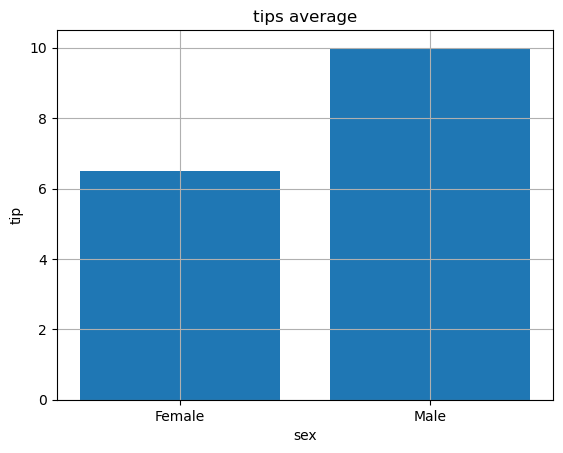

In [90]:
plt.bar(df["sex"],df["tip"])
plt.grid()
plt.xlabel("sex")
plt.ylabel("tip")
plt.title("tips average")
plt.show()